In [1]:
# Import 
import matplotlib.pyplot as plt
from lab2_functions import euler, beuler, leapfrog, runge, midpoint
import numpy as np

### Problem Accuracy

In order to investigate these two approaches to improving the accuracy of an approximation, you can use the code in
[terror.ipynb](https://github.com/rhwhite/numeric_2024/blob/main/numlabs/lab2/terror2.ipynb)
to play with the solutions to the heat conduction equation. You will need the additional functions provided for this lab. These can be found on your local computer: numeric_2024/numlabs/lab2 (you will need to fetch upstream from github to get recent changes from our version to your clone before pulling those changes to your local machine; don't forget to commit your previous labs!). For a given function $\lambda(T)$, and specified parameter values, you should experiment with various time steps and schemes, and compare the computed results (Note: only the answers to the assigned questions need to be handed in). Look at the different schemes (euler, leap-frog, midpoint, 4th order runge kutta) run them for various total times (tend) and step sizes (dt=tend/npts).

The three schemes that will be used here are forward Euler (first order), leap-frog (second order) and the fourth order Runge-Kutta scheme (which will be introduced more thoroughly in Lab 4).

Try three different step sizes for all three schemes for a total of 9 runs. It’s helpful to be able to change the axis limits to look at various parts of the plot.

In [2]:
# Definitions
theFuncs = {
    'euler': euler,
    'leapfrog': leapfrog,
    'runge': runge,
    'midpoint': midpoint
}


def eval_fun(fun_choice, arg_dict):
    """
    Parameters
    ----------
    fun_choice: str
       name of finite difference approx from lab2_functions
    arg_dict: dict
       dictionary of arguments for lab2_functions
    Returns
    -------
    approxTime, approxTemp: tuple
        tuple of ndarray float vectors with time and temperature
    """
    npts = arg_dict['npts']
    tend = arg_dict['tend']
    To = arg_dict['To']
    Ta = arg_dict['Ta']
    theLambda = arg_dict['theLambda']
    approxTime, approxTemp = theFuncs[fun_choice](npts, tend, To, Ta,
                                                  theLambda)
    return approxTime, approxTemp

#### Step Size = 0.1

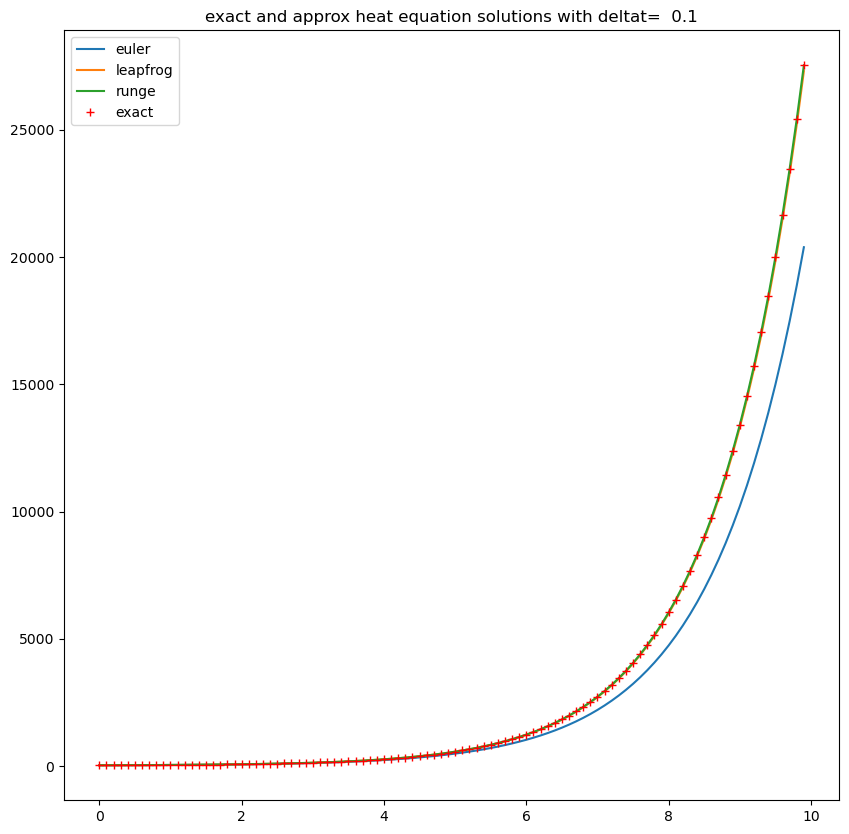

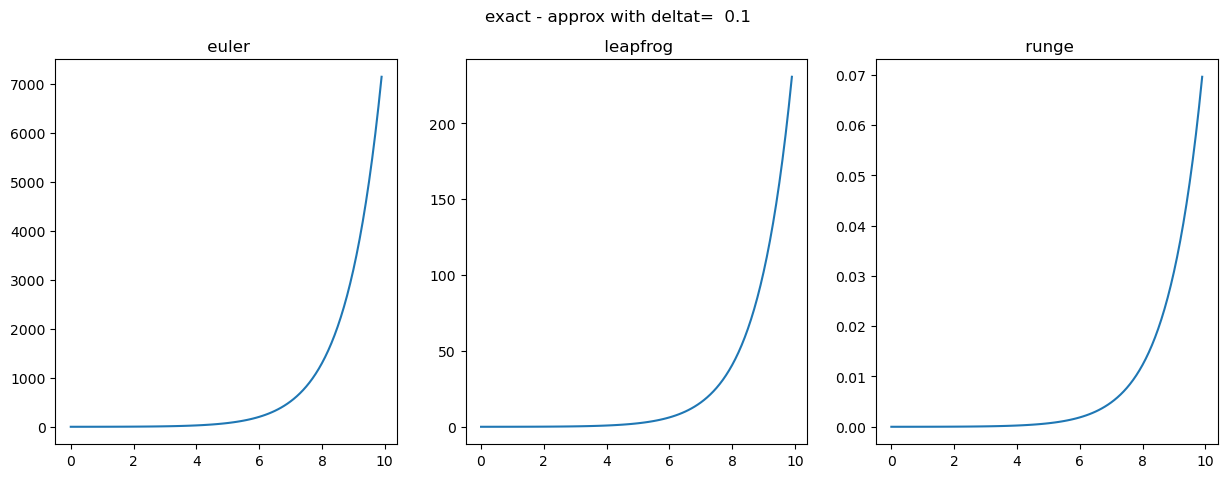

In [3]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 10.0
    theLambda = 0.8
    npts = 100

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = ['euler', 'leapfrog', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice, )
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #
    # Make a second plot that shows the difference between exact and euler
    #
    fig2, ax2 = plt.subplots(1, 3,figsize=(15, 5))
    count = 0
    for fun_choice in fun_list:
        approxTemp = keep_curves[fun_choice][1]
        difference = exactTemp - approxTemp
        ax2[count].plot(exactTime, difference, label=f"{fun_choice}")
        title = f" {fun_choice}"
        ax2[count].set(title=title)
        count += 1
    fig2.suptitle(f"exact - approx with deltat={deltat:5.2g}")
    plt.show()

In [4]:
#### Step Size = 0.1e-04

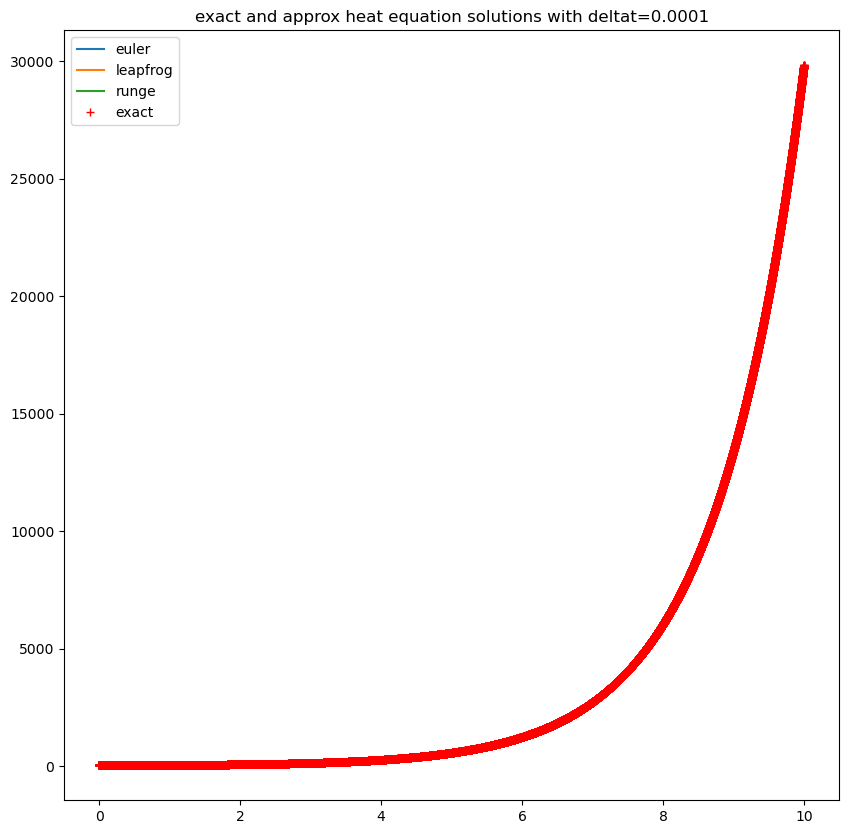

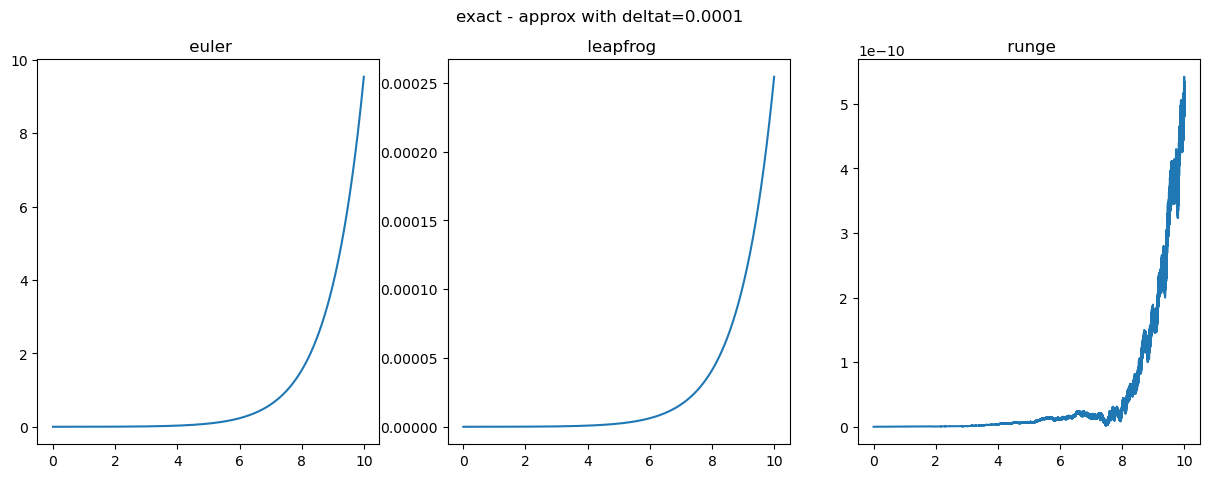

In [5]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 10.0
    theLambda = 0.8
    npts = 100000

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = [ 'euler', 'leapfrog', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice, )
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #
    # Make a second plot that shows the difference between exact and euler
    #
    fig2, ax2 = plt.subplots(1, 3,figsize=(15, 5))
    count = 0
    for fun_choice in fun_list:
        approxTemp = keep_curves[fun_choice][1]
        difference = exactTemp - approxTemp
        ax2[count].plot(exactTime, difference, label=f"{fun_choice}")
        title = f" {fun_choice}"
        ax2[count].set(title=title)
        count += 1
    fig2.suptitle(f"exact - approx with deltat={deltat:5.2g}")
    plt.show()

In [6]:
#### Step Size = 1e-05

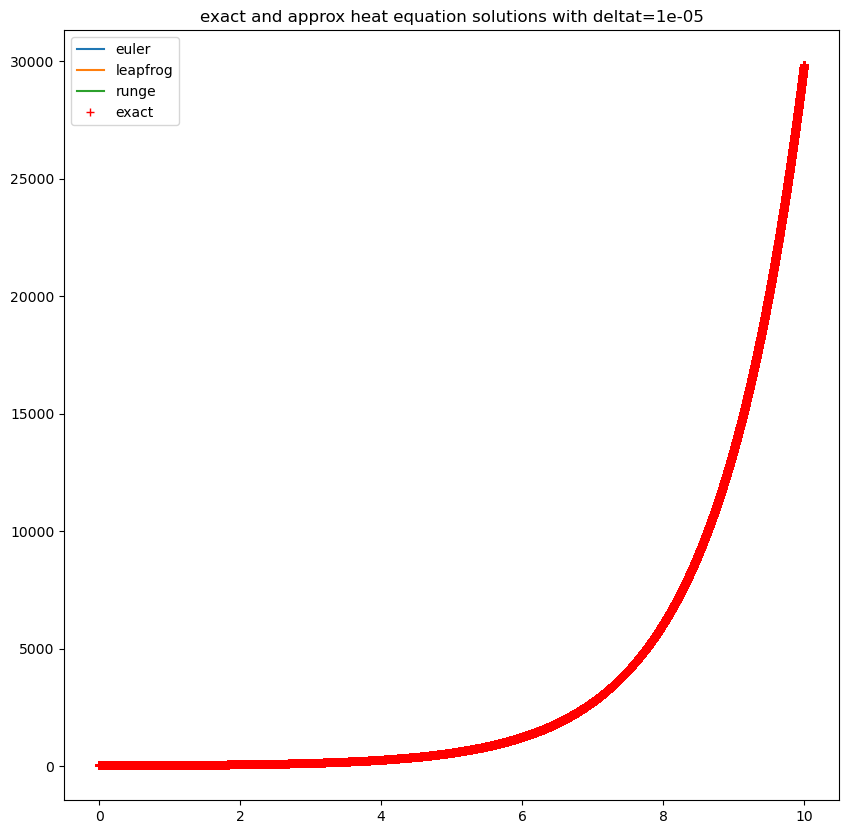

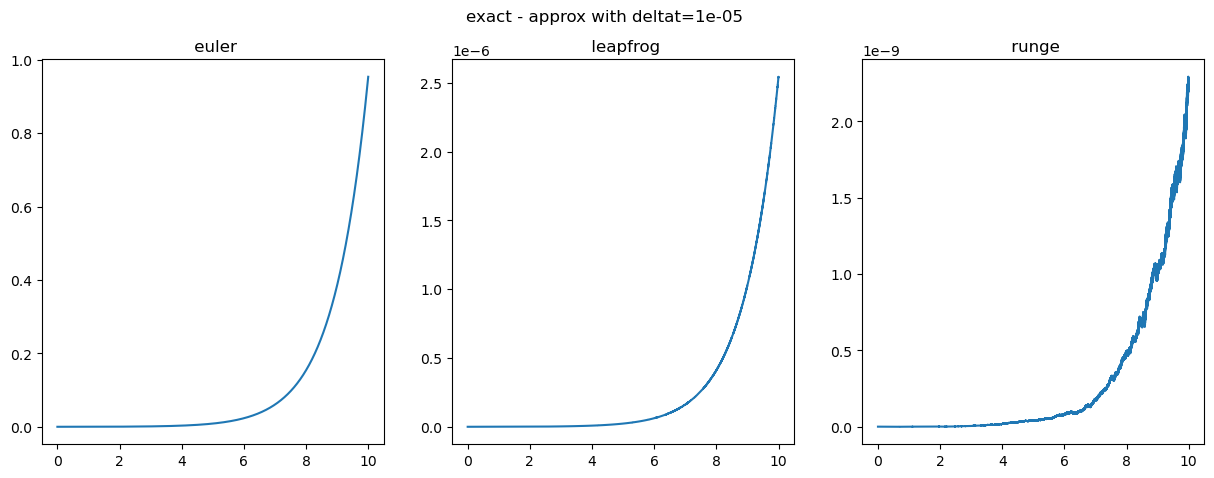

In [7]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 10.0
    theLambda = 0.8
    npts = 1000000

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = [ 'euler', 'leapfrog', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice, )
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #
    # Make a second plot that shows the difference between exact and euler
    #
    fig2, ax2 = plt.subplots(1, 3,figsize=(15, 5))
    count = 0
    for fun_choice in fun_list:
        approxTemp = keep_curves[fun_choice][1]
        difference = exactTemp - approxTemp
        ax2[count].plot(exactTime, difference, label=f"{fun_choice}")
        title = f" {fun_choice}"
        ax2[count].set(title=title)
        count += 1
    fig2.suptitle(f"exact - approx with deltat={deltat:5.2g}")
    plt.show()

Use your 9 results to answer parts a and b below.

-   a\) Does increasing the order of the scheme, or decreasing the time step
    always improve the solution?

    There is a trend of Runge > Leapfrog > Euler in terms of accuracy, therefore it seems like increasing the order of the scheme tends to improve the accuracy.
    Decreasing time step also increases the accuracy, but only up to a certain extend. When step size gets too small (on the order of 1e-5), accuracy degrades for the runge method instead as round-off error becomes dominant over truncation error.


-   b\) How would you compute the local truncation error from the error plot?
    And the global error? Do this on a plot for one set of parameters.

    The local truncation error can be estimated by the numerical difference of the error curve between time steps.
    The global error is given by the error plot itself.


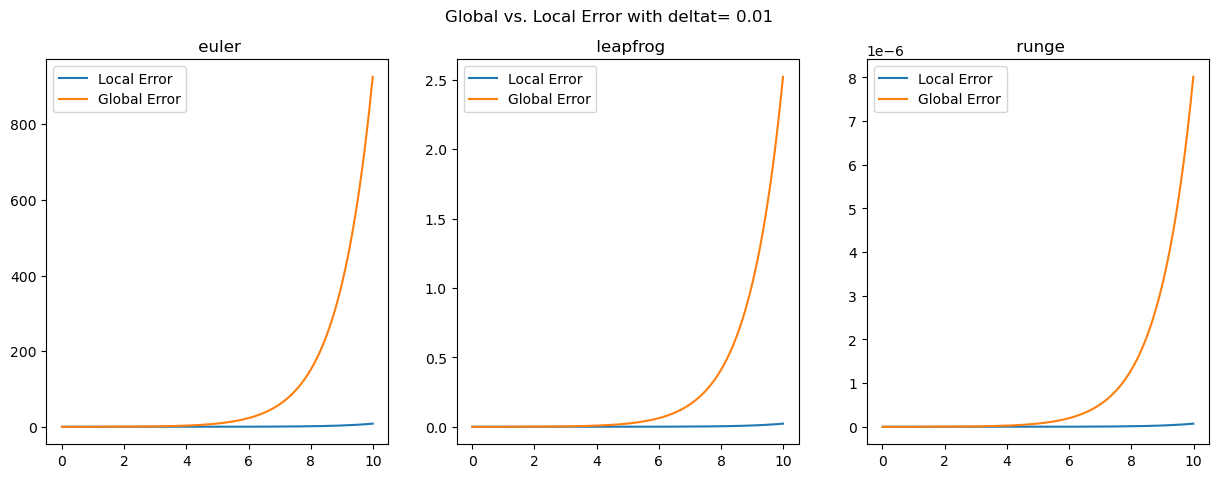

In [8]:
# Example with timestep = 0.01

if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 10.0
    theLambda = 0.8
    npts = 1000

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    #fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = ['euler', 'leapfrog', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        #ax1.plot(approxTime, approxTemp, label=fun_choice, )
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    #ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    #ax1.set(title=title)
    #ax1.legend(loc='best')
    #
    fig2, ax2 = plt.subplots(1, 3,figsize=(15, 5))
    count = 0
    for fun_choice in fun_list:
        approxTemp = keep_curves[fun_choice][1]
        difference = exactTemp - approxTemp
        local_error = np.diff(difference)
        diffTime = exactTime[1:] 
        ax2[count].plot(diffTime, local_error, label="Local Error")
        ax2[count].plot(exactTime, difference, label="Global Error")
        title = f" {fun_choice}"
        ax2[count].set(title=title)
        ax2[count].legend()
        count += 1
    fig2.suptitle(f"Global vs. Local Error with deltat={deltat:5.2g}")
    plt.show()

-   c\) Similarly, how might you estimate the *order* of the local truncation
    error? The order of the global error? ( **Hint:** An order $p$ scheme
    has truncation error that looks like $c\cdot(\Delta t)^p$. Read the
    error off the plots for several values of the grid spacing and use this
    to find $p$.) Are the local and global error significantly different?
    Why or why not?

    The order of the local and global truncation errors can be estimated by iterating the steps in b) for different step sizes, and then finding the slope of the log-log plot of error vs. step size for a particular point in time on the error curve. This tells us how quickly the errors are scaling with step sizes.

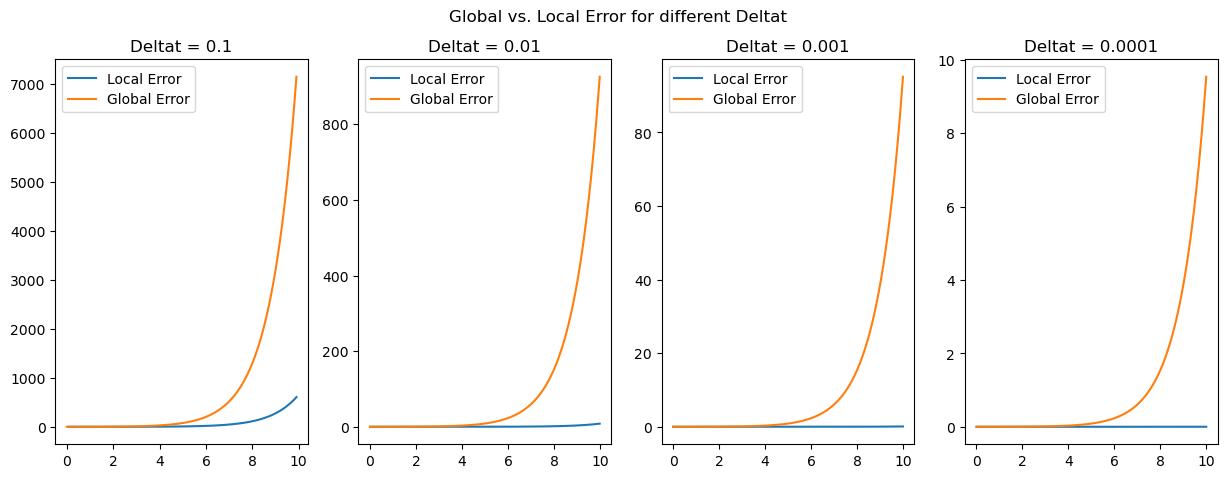

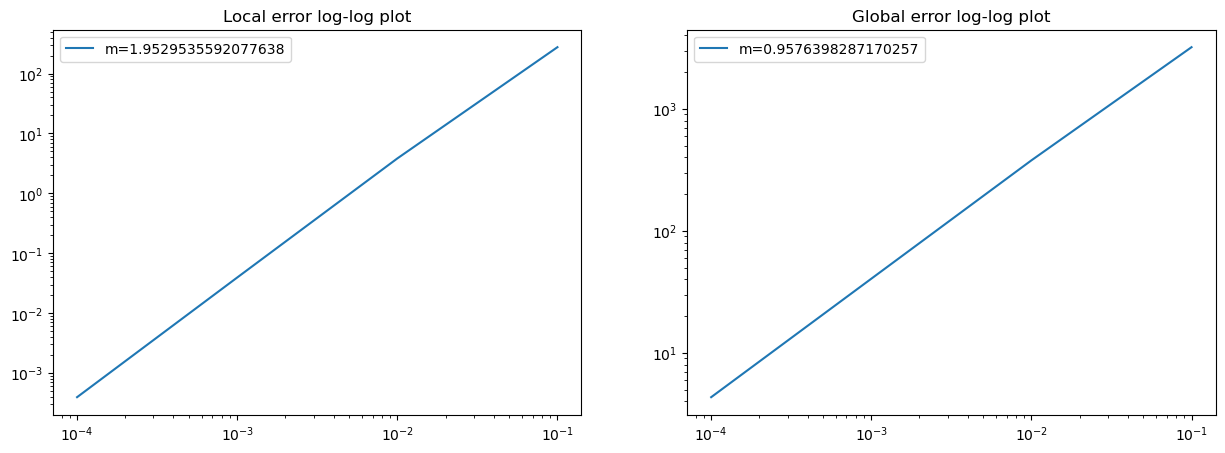

In [9]:
## Example for Forward Euler method

from scipy.interpolate import UnivariateSpline
from scipy.stats import linregress
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 10.0
    theLambda = 0.8

    keep_curves = dict()
    npts_list = [100, 1000, 10000, 100000]
    fig2, ax2 = plt.subplots(1, 4,figsize=(15, 5))
    count = 0

    for npts in npts_list:
        default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
        approxTime, approxTemp = eval_fun("euler", default_args)
        ax1.plot(approxTime, approxTemp, label=npts, )
        keep_curves[npts] = (approxTime,approxTemp)

    delta_arr = np.divide(tend, np.array(npts_list))
    global_list = []
    local_list = []
    
    for npts in npts_list:
        approxTime, approxTemp = keep_curves[npts]
        exactTime = np.empty_like(approxTime)
        exactTemp = np.empty_like(exactTime)
        for i in range(npts):
            exactTime[i] = tend * i / npts
            exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
        #ax1.plot(exactTime, exactTemp, 'r+', label='exact')
        deltat=tend / npts
        #ax1.set(title=title)
        #ax1.legend(loc='best')
        #
        difference = exactTemp - approxTemp
        local_error = np.diff(difference)
        diffTime = exactTime[1:] 
        ax2[count].plot(diffTime, local_error, label="Local Error")
        ax2[count].plot(exactTime, difference, label="Global Error")
        title = f"Deltat = {tend/npts}"
        ax2[count].set(title=title)
        ax2[count].legend()

        global_spline = UnivariateSpline(x=exactTime, y=difference)
        local_spline = UnivariateSpline(x=diffTime, y=local_error)
        t0 = 9 ## Choice of point in time to sample
        global_list.append(global_spline(t0))
        local_list.append(local_spline(t0))
        count += 1
    fig2.suptitle(f"Global vs. Local Error for different Deltat")
    
    global_arr = np.array(global_list)
    local_arr = np.array(local_list)
    global_slope = linregress(x=np.log(delta_arr), y=np.log(global_arr)).slope
    local_slope = linregress(x=np.log(delta_arr), y=np.log(local_arr)).slope
    fig3, ax3 = plt.subplots(1, 2,figsize=(15, 5))
    ax3[0].loglog(delta_arr, local_arr, label=f"m={local_slope}")
    ax3[0].set(title='Local error log-log plot')
    ax3[0].legend()
    ax3[1].loglog(delta_arr, global_arr, label=f"m={global_slope}")
    ax3[1].set(title='Global error log-log plot')
    ax3[1].legend()
    
    plt.show()

From the log-log plot the curve is almost linear. The order of the error are thus given by the slope of the curves rounded off to the nearest integer. This tells us that the local truncation error of the forward Euler method scales with (delta t)^2, while the global error scales linearly with delta t. The order of global accuracy is one less than that of local accuracy, as expected.


### Problem Stability

This example is a slight modification of [Problem accuracy](#Problem-Accuracy) from the previous section on accuracy. We will add one scheme (backward euler) and drop the 4th order Runge-Kutta, and change the focus from error to stability. The value of $\lambda$ is assumed a constant, so that the backward Euler scheme results in an explicit method, and we’ll also compute a bit further in time, so that any instability manifests itself more clearly. Run the [stability2.ipynb](https://github.com/rhwhite/numeric_2024/blob/main/numlabs/lab2/stability2.ipynb) notebook in numlabs/lab2 with $\lambda= -8\ s^{-1}$, with $\Delta t$ values that just straddle the stability condition for the forward euler scheme
($\Delta t < \frac{-2}{\lambda}$, derived below). Create plots that show that 
1) the stability condition does in fact predict the onset of the instablity in the euler scheme, and

3) determine whether the backward euler and leap-frog are stable or unstable for the same $\Delta t$ values. (you should run out to longer than tend=10 seconds to see if there is a delayed instability.)

and provide comments/markdown code explaining what you see in the plots.


In [10]:
# Define
theFuncs={'euler':euler,'beuler':beuler,'leapfrog':leapfrog}

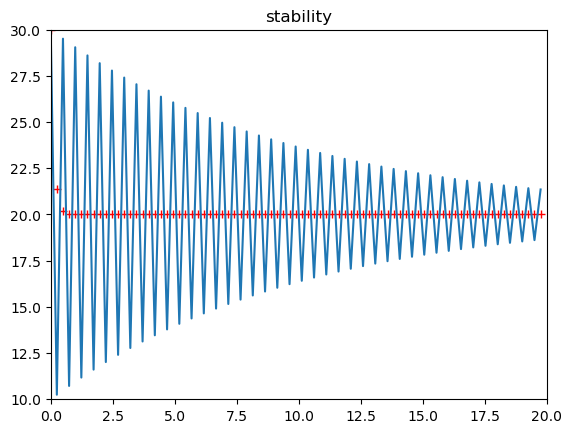

In [21]:
# Plot
if __name__=="__main__":
    tend=20.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='euler'
    npts=81
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,20])
    theAx.set_ylim([10,30])
    theAx.set_title('stability')
    plt.show()

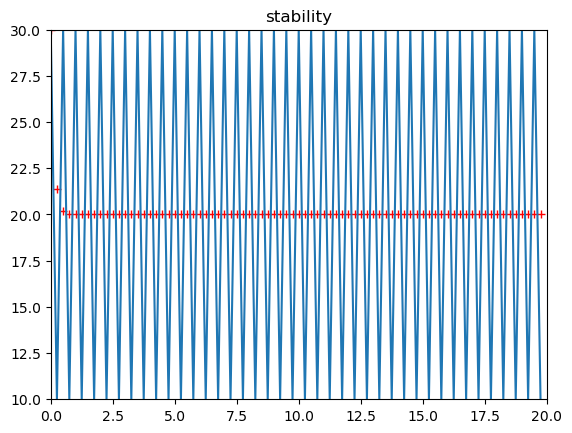

In [20]:
# Plot
if __name__=="__main__":
    tend=20.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='euler'
    npts=80
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,20])
    theAx.set_ylim([10,30])
    theAx.set_title('stability')
    plt.show()

1. According to the stability condition, delta t needs to beless than 0.25.
For delta = 20/81 < 0.25, we see that the spurious oscillations decay with time.
For delta = 20/80 = 0.25, the spurious oscillations do not decay with time.
Thus the stability condition predicts the exact point where the instability does not decay with increasing time.

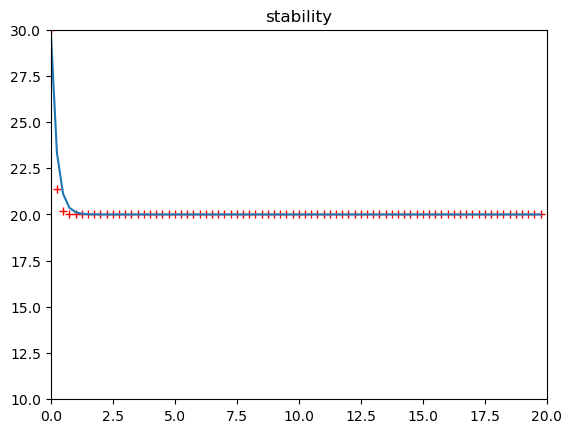

In [19]:
# Plot
if __name__=="__main__":
    tend=20.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='beuler'
    npts=80
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,20])
    theAx.set_ylim([10,30])
    theAx.set_title('stability')
    plt.show()

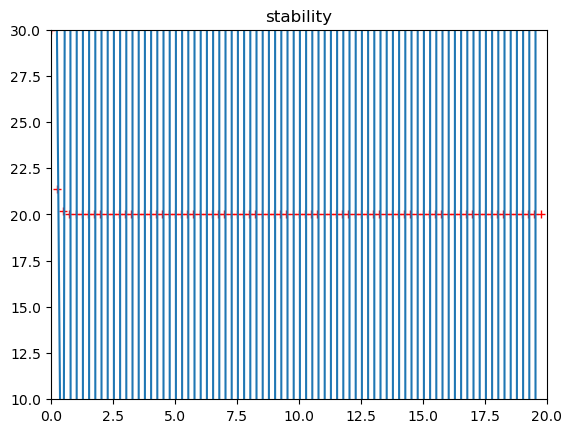

In [18]:
# Plot
if __name__=="__main__":
    tend=20.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='leapfrog'
    npts=80
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,20])
    theAx.set_ylim([10,30])
    theAx.set_title('stability')
    plt.show()

2. For the same timestep at the stability criterion, backwards euler is stable, while leapfrog is unstable. The frequency of spurious oscillations in the leapfrog method is higher than that in forward euler. The stability of backwards euler holds for a large range of timestep sizes.

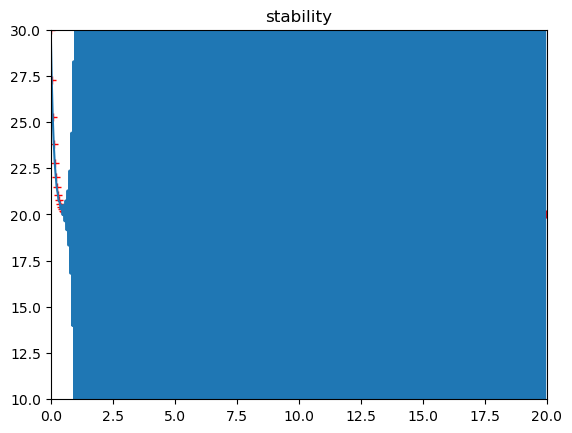

In [15]:
# Plot
if __name__=="__main__":
    tend=20.
    Ta=20.
    To=30.
    theLambda=-8.
    funChoice='leapfrog'
    npts=500
    approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    exactTime=np.empty([npts,],float)
    exactTemp=np.empty_like(exactTime)
    for i in np.arange(0,npts):
       exactTime[i] = tend*i/npts
       exactTemp[i] = Ta + (To-Ta)*np.exp(theLambda*exactTime[i])
    plt.close('all')
    plt.figure(1)
    plt.clf()
    plt.plot(exactTime,exactTemp,'r+')
    plt.plot(approxTime,approxTemp)
    theAx=plt.gca()
    theAx.set_xlim([0,20])
    theAx.set_ylim([10,30])
    theAx.set_title('stability')
    plt.show()

Interestingly, decreasing the timestep for the leapfrog method does not lead to the oscillations decaying in the long run. Rather the onset of instability is delayed further for smaller and smaller timesteps.